In [3]:
########################################
# Packages
########################################
import warnings
import h5py as h5
import numpy as np
import pandas as pd
import multiprocessing as mp

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import math

import statistics

from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic
import scipy.stats.distributions as dist

import seaborn as sns

In [20]:
from data_processing import SHARKDataProcessor
processor = SHARKDataProcessor()

# Define subvolume IDs and HDF5 file paths
sv_list = np.arange(64)
sharkfiles = [f'chandro_gomez_extracted_py/PSO_space4_L24HBT_SMFz0SMFz1/201/{sv}/galaxies.hdf5' for sv in sv_list] #DEFINE FILE

# Output shark_csv dataframe
shark_csv = processor.process_all_subvolumes(sv_list, sharkfiles)
print(shark_csv.head())

  ID_galaxy ID_subhalo    ID_subhalo_tree ID_halo  sv  type    Mhalo_host  \
0       0_0        0_1  0_201000000000002     0_1   0     0  4.615949e+13   
1   0_13293        0_2  0_201000001068281     0_1   0     1  4.615949e+13   
2    0_2489        0_3  0_201000000190829     0_1   0     1  4.615949e+13   
3   0_14426        0_4  0_201000001162466     0_1   0     1  4.615949e+13   
4   0_32551        0_5  0_201000002709050     0_1   0     1  4.615949e+13   

          Mhalo   Mstar_bulge    Mstar_disc  ...  SFR_bulge  SFR_disc  \
0  4.354074e+13  2.437731e+11  0.000000e+00  ...   0.005694       0.0   
1  1.338565e+12  3.965483e+10  5.481462e+09  ...   0.000000       0.0   
2  1.554335e+11  1.972215e+10  2.928223e+09  ...   0.000000       0.0   
3  1.213300e+11  2.116264e+09  7.046472e+08  ...   0.000000       0.0   
4  1.026386e+11  4.924728e+08  0.000000e+00  ...   0.000000       0.0   

    SFR_all           MBH  MBHacc_cold    MBHacc_hot    MBHacc_all  \
0  0.005694  1.241851e+10   

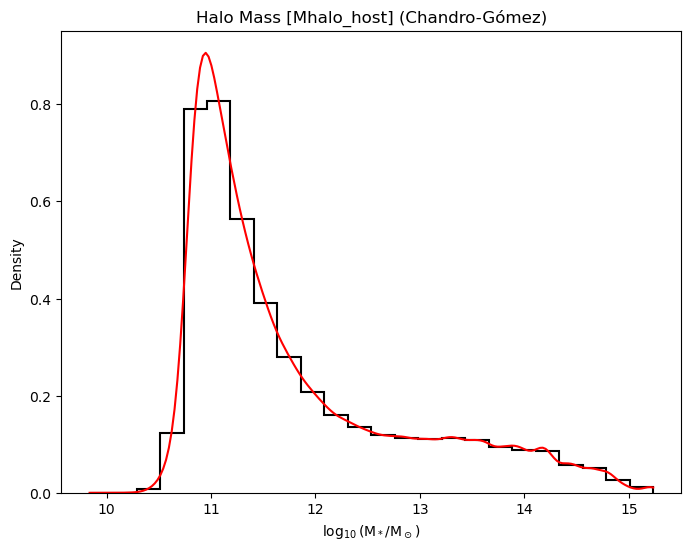

In [29]:
########################################
# Halo Mass (Histogram + KDE)
########################################

# Calling halo mass values and eliminating ones less than 0
HaloM_fig1 = shark_csv['Mhalo_host']
HaloM_fig1 = HaloM_fig1[HaloM_fig1 > 0]

########################################
# KDE
########################################

# Log-transform halo mass values for KDE
HaloM_fig1_log = np.log10(HaloM_fig1)

# Create KDE based on log-transformed values
KDEtest_fig1 = gaussian_kde(HaloM_fig1_log)

# Generate x values for KDE in log space and evaluate KDE
KDE_xvals_fig1 = np.linspace(min(HaloM_fig1_log), max(HaloM_fig1_log), 200)
KDE_yvals_fig1 = KDEtest_fig1(KDE_xvals_fig1)

########################################
# Plotting Histogram + KDE
########################################
fig, ax1 = plt.subplots(figsize=(8, 6))

# Histogram with logarithmic bins and density normalization
bins_fig1 = np.linspace(np.min(HaloM_fig1_log), np.max(HaloM_fig1_log), 25)
ax1.hist(HaloM_fig1_log, bins=bins_fig1, histtype='step', linewidth=1.5, color='black', density=True, label='Histogram')

# Plot KDE, converting x values back to linear scale
ax1.plot(KDE_xvals_fig1, KDE_yvals_fig1, color='red', label='KDE')

# Set scales and labels
ax1.set_xlabel(r'$\log_{10}(\mathrm{M_*}/\mathrm{M}_\odot)$')
ax1.set_ylabel('Density')
ax1.set_title('Halo Mass [Mhalo_host] (Chandro-Gómez)')

plt.show()

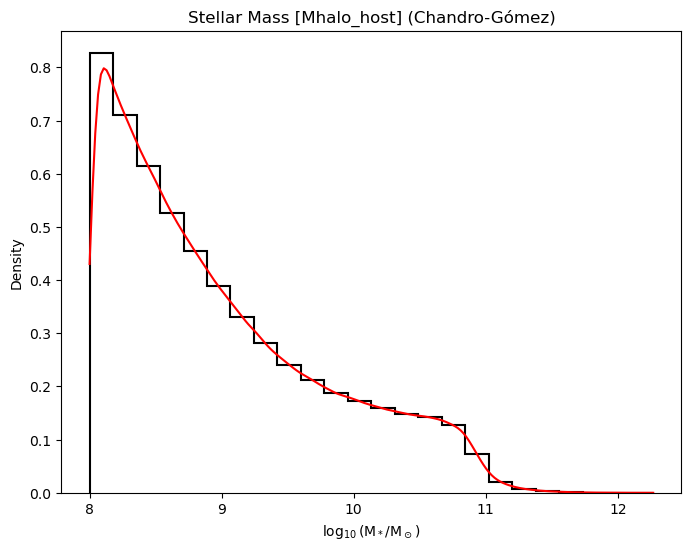

In [30]:
########################################
# Stellar Mass (Histogram + KDE)
########################################

# Calling halo mass values and eliminating ones less than 0
StellarM_fig1 = shark_csv['Mstar_all']
StellarM_fig1 = StellarM_fig1[StellarM_fig1 > 0]

########################################
# KDE
########################################

# Log-transform halo mass values for KDE
StellarM_fig1_log = np.log10(StellarM_fig1)

# Create KDE based on log-transformed values
Stellar_KDEtest_fig1 = gaussian_kde(StellarM_fig1_log)

# Generate x values for KDE in log space and evaluate KDE
Stellar_KDE_xvals_fig1 = np.linspace(min(StellarM_fig1_log), max(StellarM_fig1_log), 200)
Stellar_KDE_yvals_fig1 = Stellar_KDEtest_fig1(Stellar_KDE_xvals_fig1)

########################################
# Plotting Histogram + KDE
########################################
fig, ax1 = plt.subplots(figsize=(8, 6))

# Histogram with logarithmic bins and density normalization
bins_fig1 = np.linspace(np.min(StellarM_fig1_log), np.max(StellarM_fig1_log), 25)
ax1.hist(StellarM_fig1_log, bins=bins_fig1, histtype='step', linewidth=1.5, color='black', density=True, label='Histogram')

# Plot KDE, converting x values back to linear scale
ax1.plot(Stellar_KDE_xvals_fig1, Stellar_KDE_yvals_fig1, color='red', label='KDE')

# Set scales and labels
ax1.set_xlabel(r'$\log_{10}(\mathrm{M_*}/\mathrm{M}_\odot)$')
ax1.set_ylabel('Density')
ax1.set_title('Stellar Mass [Mhalo_host] (Chandro-Gómez)')

plt.show()

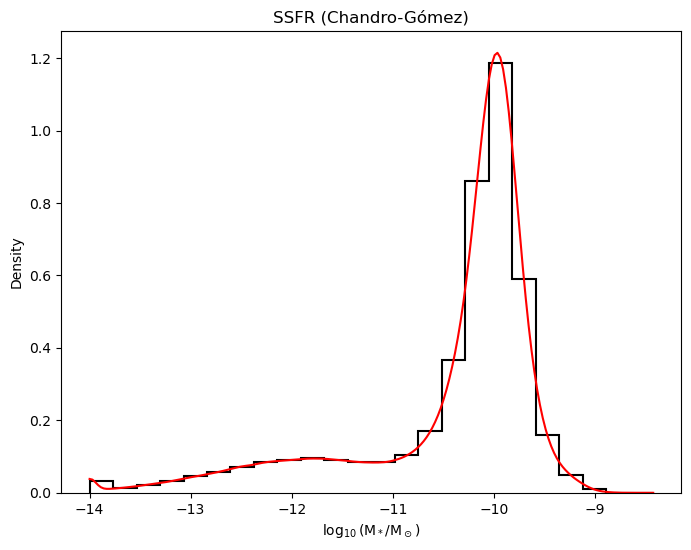

In [31]:
########################################
# SSFR (Histogram + KDE)
########################################
SSFR = shark_csv['SFR_all'] / shark_csv['Mstar_all']
# Calling halo mass values and eliminating ones less than 0
SSFR = SSFR[SSFR > 0]
SSFR = np.where(SSFR < 1e-14, 1e-14, SSFR)

########################################
# KDE
########################################

# Log-transform halo mass values for KDE
SSFR_fig1_log = np.log10(SSFR)

# Create KDE based on log-transformed values
Stellar_KDEtest_fig1 = gaussian_kde(SSFR_fig1_log)

# Generate x values for KDE in log space and evaluate KDE
SSFR_KDE_xvals_fig1 = np.linspace(min(SSFR_fig1_log), max(SSFR_fig1_log), 200)
SSFR_KDE_yvals_fig1 = Stellar_KDEtest_fig1(SSFR_KDE_xvals_fig1)

########################################
# Plotting Histogram + KDE
########################################
fig, ax1 = plt.subplots(figsize=(8, 6))

# Histogram with logarithmic bins and density normalization
bins_fig1 = np.linspace(np.min(SSFR_fig1_log), np.max(SSFR_fig1_log), 25)
ax1.hist(SSFR_fig1_log, bins=bins_fig1, histtype='step', linewidth=1.5, color='black', density=True, label='Histogram')

# Plot KDE, converting x values back to linear scale
ax1.plot(SSFR_KDE_xvals_fig1, SSFR_KDE_yvals_fig1, color='red', label='KDE')

# Set scales and labels
ax1.set_xlabel(r'$\log_{10}(\mathrm{M_*}/\mathrm{M}_\odot)$')
ax1.set_ylabel('Density')
ax1.set_title('SSFR (Chandro-Gómez)')

plt.show()